In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch 
from hubconf import MiDaS, transforms
from midas.midas_net import MidasNet

In [3]:
import cv2
import torch
import urllib.request
import matplotlib.pyplot as plt
plt.rcParams["image.cmap"] = 'plasma' 

In [4]:
model = MiDaS()
transform = transforms().default_transform

Loading weights:  None


Downloading: "https://github.com/facebookresearch/WSL-Images/archive/main.zip" to /root/.cache/torch/hub/main.zip
Downloading: "https://download.pytorch.org/models/ig_resnext101_32x8-c38310e5.pth" to /root/.cache/torch/hub/checkpoints/ig_resnext101_32x8-c38310e5.pth
100.0%
Downloading: "https://github.com/intel-isl/MiDaS/releases/download/v2_1/model-f6b98070.pt" to /root/.cache/torch/hub/checkpoints/model-f6b98070.pt
100.0%


In [7]:
from src.datasets.apollo_scape import ApolloScape
from src.datasets.hr_wsi import HRWSI
from src.datasets.red_web import RedWeb

In [8]:
def predict(img):
    input_batch = transform(img)    
    with torch.no_grad():
        prediction = model(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()
        output = prediction.cpu().numpy()
        return output

## ApolloScape

In [11]:
dataset = ApolloScape(remote=True, username='jellouli')

Remote server password: ········


In [16]:
img, disp = next(iter(dataset))

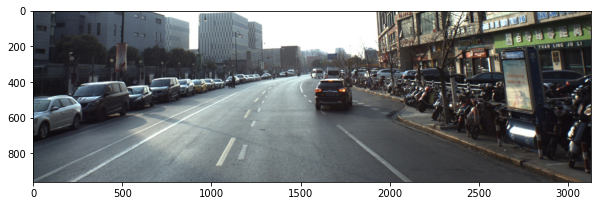

In [17]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()

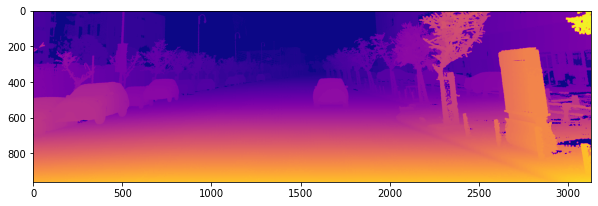

In [18]:
plt.figure(figsize=(10,15))
plt.imshow(disp)
plt.show()

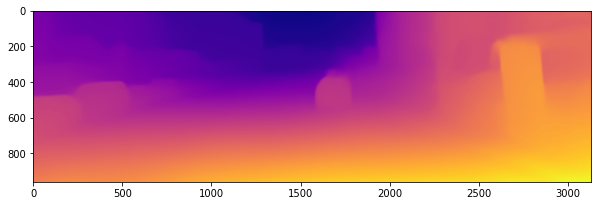

In [19]:
plt.figure(figsize=(10,15))
plt.imshow(predict(img))
plt.show()

## HR-WSI

In [283]:
dataset = HRWSI(remote=True, username='jellouli')

Remote server password: ········


In [288]:
img, disp = next(iter(dataset))

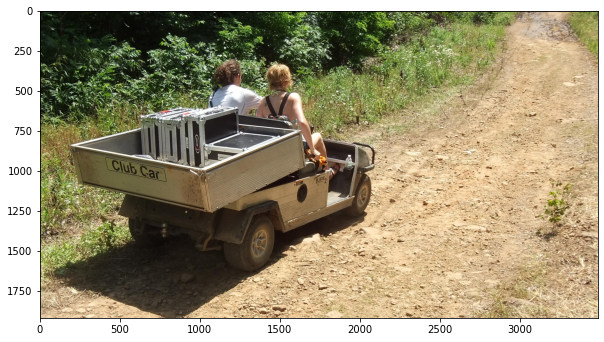

In [289]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()

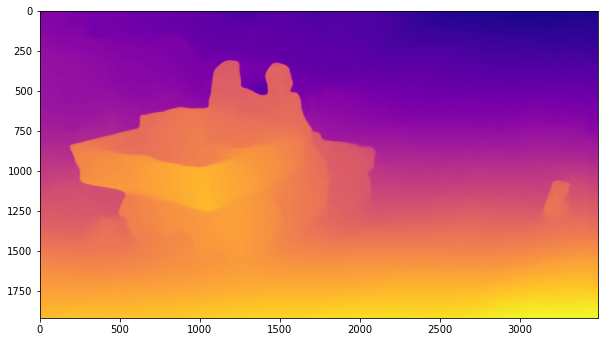

In [290]:
plt.figure(figsize=(10,15))
plt.imshow(disp)
plt.show()

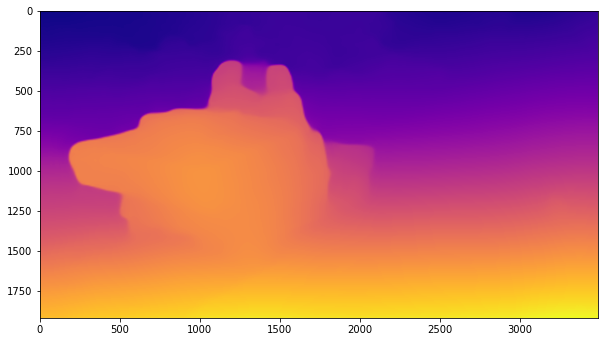

In [291]:
plt.figure(figsize=(10,15))
plt.imshow(predict(img))
plt.show()

## RedWeb

In [296]:
dataset = RedWeb(remote=True, username='jellouli')

Remote server password: ········


In [301]:
img, disp = next(iter(dataset))

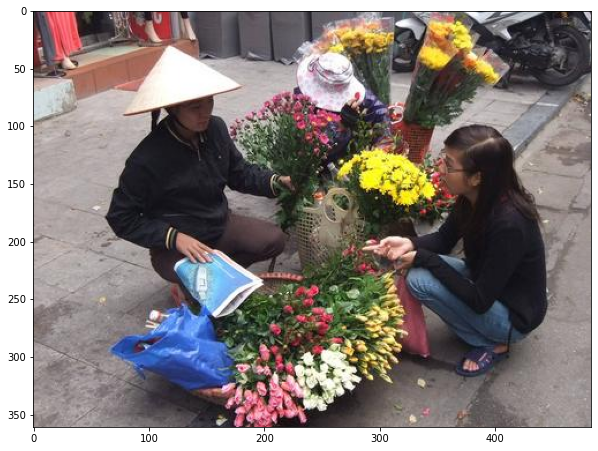

In [302]:
plt.figure(figsize=(10,15))
plt.imshow(img)
plt.show()

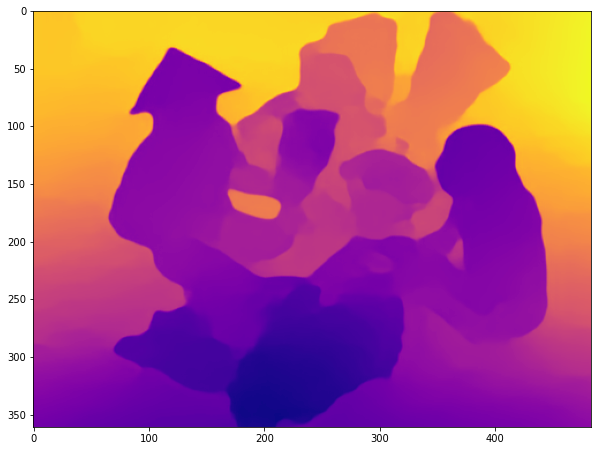

In [303]:
plt.figure(figsize=(10,15))
plt.imshow(disp)
plt.show()

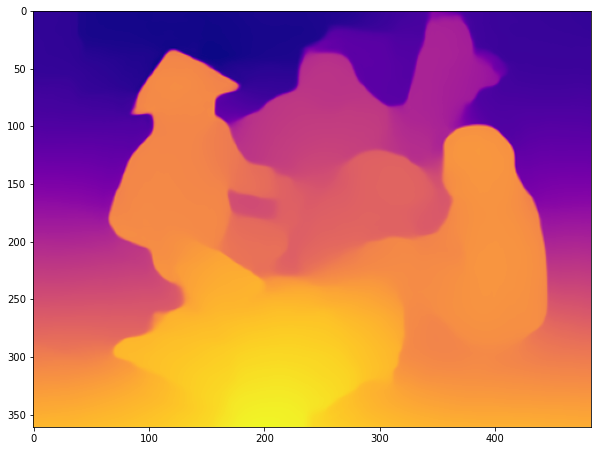

In [304]:
plt.figure(figsize=(10,15))
plt.imshow(predict(img))
plt.show()